In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.animation as animation
from IPython.display import HTML


In [4]:
class Institute:
  def __init__ (self,location, area, name):
    self.location = location
    self.name = name
    self.area = area



In [5]:
class Student:
  global dt
  global a

  dt = 0.1
  a = np.array([0,0])
  def __init__ (self,Inst, Infect, Position, Vaci, Velocity, Quaren, Schedule,Imune, V0,Time):
    self.Inst = Inst
    self.Infect = Infect
    self.Position = Position
    self.Vaci = Vaci
    self.Velocity = Velocity
    self.Quaren = Quaren
    self.Schedule = Schedule
    self.Imune = Imune
    self.V0 = V0
    self.Time = Time
    self.Goal = Schedule[Time[0]][Time[1]]



  def Set_Goal(self,time):
    self.Goal = self.Schedule[time[0]][time[1]]


  def Set_P0(self, PosiInicial):
    self.Position = PosiInitial
  
  def Set_V0(self, v0):
    self.Velocity = v0

  def att_posi(self):
    self.Position = self.Position + self.Velocity*dt
  
  def att_velo(self):
    self.Velocity = self.Velocity +a*dt


    


In [6]:
def Generate_Schedule(inst):
  # Create a schedule based on the institute that you specified 
  # Note that the inst_list needs to have the institutes listed in the same order as the institutes in the p_list


  inst_list = ["IFGW","IC", "IMECC"]
  if inst == "IFGW":                                        # These are the probabilities of somoene who is in IFGW taking a class in each istitute
    p_IFGW = 0.7                                            # For now, these are done manualy. We may need to find another way of doing it 
    p_IC = 0.1                                               
    p_IMECC = 0.2
    
  if inst == "IMECC":
    p_IFGW = 0.05
    p_IC = 0.25
    p_IMECC = 0.7

  if inst == "IC":
    p_IFGW = 0
    p_IC = 0.8
    p_IMECC = 0.2

  p_list =  [p_IFGW,p_IC,p_IMECC]
  d = ["Mon", "Tue", "Wed","Thu","Fri"]
  schedule = {}
  
  for i in range(5):
    schedule[d[i]] = {}
    t = [8,9,10,11,14,15,16,17,18,19,20]                      # Times in wich you may have classes
    for j in range(6):                                        # In the future I might change this to take in consideration the distribution of classes in a certain time, in order to be more realistic
       h = random.randint(0,len(t)-1)
       p = random.randint(1,100)/100
       schedule[d[i]][t[h]] = np.random.choice(inst_list,p =p_list)
       t.remove(t[h])
    for j in range(0,len(t)):
      schedule[d[i]][t[j]] = ""
    schedule[d[i]][12] = ""
    schedule[d[i]][13] = ""
    
  return schedule


In [7]:
def Create_Population(n,inst_distrib, vaci_prob, infect_prob, symp_prob, imune_prob):
  # Creates a population for the University 
  # n is the number of people you want to create
  # inst_distrib is the percentage of people in each institute: Needs to be a dictionary e.g.: {"IC": 0.25, "IFGW": 0.25, "IMECC": 0.5} 
  # vaci_prob is the probability of someone beeing vacinated 
  # infect_prob is the probaility of someone beeing infected in the beginning of the simulation
  # symp_prob is the probability of someone infected showing symptoms 
  # imune _prob is the probability of someone beeing imune in the beginning of the simulation 


  pop = []
  inst_list = list(inst_distrib.keys())
  inst_p = []
  n_inst = len(inst_list)
  buff = 0
  vac_efi = 97/100

  for i in inst_list:
    buff += inst_distrib[i]
    inst_p.append(buff)


  for i in range(n):
    p_inst = random.randint(1,100)/100
    p_infect = random.randint(1,100)/100
    p_vaci =  random.randint(1,100)/100
    p_vaci_efi = random.randint(1,100)/100
    p_symp =  random.randint(1,100)/100
    p_imune =  random.randint(1,100)/100

    index = 0
    for j in inst_p:
      if p_inst <= inst_p[index]:
        inst = inst_list[index]
        index = 0
        break
      index += 1

    imune = False
    if p_imune <= imune_prob:
      imune = True 

    vaci = False
    if p_vaci <= vaci_prob and imune == False:
      vaci = True
      if p_vaci_efi <= vac_efi:
        imune = True

    infect = 0
    if p_infect <= infect_prob and imune == False:
      if p_symp <= symp_prob:
        infect = 2
      else:
        infect = 1                  # Infected and symptomatic: infect = 2, Infected and Assymptomatic: infect = 1, Not infected = 0


    schedule = Generate_Schedule(inst)
    pop.append(Student(inst,infect,np.array([0,0]),vaci,np.array([0,0]),False, schedule , imune,np.array([0,0]),["Mon",8]))

  return pop


In [8]:
inst_distrib = {}
inst_distrib["IMECC"] = 50
inst_distrib["IFGW"] = 80
inst_distrib["IC"] = 30

buff = 0
for i in inst_distrib:
  buff += inst_distrib[i]

for i in inst_distrib:
  inst_distrib[i] = inst_distrib[i]/buff



In [9]:
def Generate_University(Institute_list,fig,ax):
  for i in Institute_list:
    r = np.sqrt(i.area/np.pi)
    area = plt.Circle(i.location,r,fc = "lightblue", zorder = 0)
    ax.scatter(i.location[0],i.location[1], color = "blue",zorder = 10)
    ax.add_patch(area)


In [10]:
def random_walk (V):
  theta  = np.random.choice(360)*np.pi/180
  v = np.array([1,1])/(np.linalg.norm([1,1])) * V             #V = "Size" of the velocity vector 
  M = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta),np.cos(theta)]])
  v = M.dot(v)
  return v

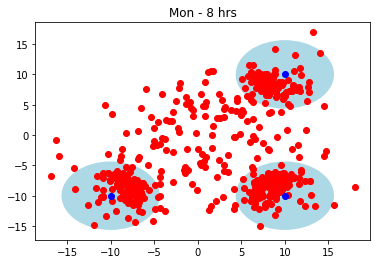

In [12]:

students = Create_Population(500,inst_distrib,10/100,10/100,10/100,10/100)
#students = [Student("IFGW",True,np.array([0,0]),0,np.array([0,0]),False, {"Mon":{8:"IFGW",9:"IC",10:"IMECC"}} , 0,np.array([0,0]),["Mon",8])]
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

IFGW = Institute(np.array([10,10]), 100, "IFGW")
IMECC = Institute(np.array([10,-10]), 100, "IMECC")
IC = Institute(np.array([-10,-10]), 100, "IC")
inst_dict = {"IFGW":IFGW,"IC":IC, "IMECC": IMECC}
inst_list = [IFGW,IC,IMECC]

frames =250
count = 0


def animate (i, week,frames):
  ax.clear()
  Generate_University(inst_list,fig,ax)
  d_time = frames/len(week)
  h_time = d_time/13



  for i in students:
    Student.Set_Goal(i,goal)
      if not i.Goal == "":
        if (i.Position[0]-inst_dict[i.Goal].location[0])**2 + (i.Position[1]-inst_dict[i.Goal].location[1])**2 <= inst_dict[i.Goal].area / (2*np.pi):
          i.Velocity = random_walk(2) 
        else:
          v0 = (inst_dict[i.Goal].location - i.Position)/(np.linalg.norm((inst_dict[i.Goal].location - i.Position))) * 2  
          Student.Set_V0(i, v0 + random_walk(4))
    else:
      Student.Set_V0(i, random_walk(4))
      

    Student.att_posi(i)
    ax.scatter(i.Position[0],i.Position[1], color = "Red",marker = "o")
  ax.set_title( str(goal[0]) + " - " + str(goal[1])+ " hrs")


week = [[['Mon', 8], ['Mon', 9], ['Mon', 10], ['Mon', 11], ['Mon', 12], ['Mon', 13], ['Mon', 14], ['Mon', 15], ['Mon', 16], ['Mon', 17], ['Mon', 18], ['Mon', 19], ['Mon', 20]], [['Tue', 8], ['Tue', 9], ['Tue', 10], ['Tue', 11], ['Tue', 12], ['Tue', 13], ['Tue', 14], ['Tue', 15], ['Tue', 16], ['Tue', 17], ['Tue', 18], ['Tue', 19], ['Tue', 20]], [['Wed', 8], ['Wed', 9], ['Wed', 10], ['Wed', 11], ['Wed', 12], ['Wed', 13], ['Wed', 14], ['Wed', 15], ['Wed', 16], ['Wed', 17], ['Wed', 18], ['Wed', 19], ['Wed', 20]], [['Thu', 8], ['Thu', 9], ['Thu', 10], ['Thu', 11], ['Thu', 12], ['Thu', 13], ['Thu', 14], ['Thu', 15], ['Thu', 16], ['Thu', 17], ['Thu', 18], ['Thu', 19], ['Thu', 20]], [['Fri', 8], ['Fri', 9], ['Fri', 10], ['Fri', 11], ['Fri', 12], ['Fri', 13], ['Fri', 14], ['Fri', 15], ['Fri', 16], ['Fri', 17], ['Fri', 18], ['Fri', 19], ['Fri', 20]]]
time = [["Mon",8],["Mon",9]]

ax.set_xlim(20)
ax.set_ylim(20)

anim = animation.FuncAnimation(fig, animate, interval = 100, fargs = [time,frames], save_count = frames )

    

HTML(anim.to_html5_video())

